# Pathway enrichment in MAFA WT T2
Collab Theis - Hebrok labs

Data analysis: Alexander Fastner

based on Data analysis by: Sara Jimenez

Data generation: Veronica Cochrane

## Loading Packages

In [1]:
import scanpy as sc
import decoupler as dc

# Only needed for processing
import numpy as np
import pandas as pd
from anndata import AnnData

## Load Data

In [2]:
# Read raw data and process it
adata = pd.read_csv('../data/MAFA_WT_gene_count.txt', index_col=20, sep='\t').T
adata

gene_name,CHGA,MT-CO1,GCG,INS,MT-ND4,EEF1A1,MT-ND5,TTR,MT-CO2,MT-CYB,...,RNA5-8SN4,AL354822.1,AC023491.2,RF00003,RF01972,RF01973,RF01974,AC233755.2,AC233755.1,AC213203.1
MAFAWT_001,769950,469036,398234,164748,186078,116719,151341,178909,133640,121061,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_002,760265,204988,207026,146662,80616,98010,70795,109150,55131,49581,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_003,672585,522418,378290,146501,243656,93180,195788,131732,163870,158054,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_004,820162,262856,502891,171062,117809,132909,97752,150350,79653,75222,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_005,878886,335731,73413,123677,122960,127821,102340,30019,96654,85530,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_006,878745,350758,114376,147449,134333,125976,105483,31916,99623,94874,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_007,1129979,359712,159369,65313,156749,104854,156351,25998,108889,113709,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_008,1017468,285966,157747,109003,111200,119484,89777,32111,89609,81167,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_009,800671,176313,194431,139982,64275,101077,52585,53031,49169,39752,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_010,633710,177343,219577,113536,73264,76057,64194,57478,50504,46106,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Transform to AnnData object
adata = AnnData(adata, dtype=np.float32)
adata.var_names_make_unique()
adata

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 20 × 58735

In [4]:
# Read metadata 
metadata = pd.read_csv('../data/2023_MAFA_MetaData.txt', index_col=0, sep='\t')
metadata

,Sample_Description,Treatment,Genotype,TimePoint,Batch,DOX,GroupName
SampleID,,,,,,,
MAFAWT_001,MAFAWT,MAFA,WT,T0,1,N,MAFA_WT_T0
MAFAWT_002,MAFAWT,MAFA,WT,T0,1,N,MAFA_WT_T0
MAFAWT_003,MAFAWT,MAFA,WT,T0,1,N,MAFA_WT_T0
MAFAWT_004,MAFAWT,MAFA,WT,T0,1,N,MAFA_WT_T0
MAFAWT_005,MAFAWT,MAFA,WT,T2,1,Y,MAFA_WT_T2
MAFAWT_006,MAFAWT,MAFA,WT,T2,1,Y,MAFA_WT_T2
MAFAWT_007,MAFAWT,MAFA,WT,T2,1,Y,MAFA_WT_T2
MAFAWT_008,MAFAWT,MAFA,WT,T2,1,Y,MAFA_WT_T2
MAFAWT_009,MAFAWT,MAFA,WT,T1,1,Y,MAFA_WT_T1


In [5]:
adata.obs['condition'] = metadata['Treatment']
adata.obs['time_point'] = metadata['TimePoint']
adata.obs['DOX'] = metadata['DOX']
adata.obs

,condition,time_point,DOX
MAFAWT_001,MAFA,T0,N
MAFAWT_002,MAFA,T0,N
MAFAWT_003,MAFA,T0,N
MAFAWT_004,MAFA,T0,N
MAFAWT_005,MAFA,T2,Y
MAFAWT_006,MAFA,T2,Y
MAFAWT_007,MAFA,T2,Y
MAFAWT_008,MAFA,T2,Y
MAFAWT_009,MAFA,T1,Y
MAFAWT_010,MAFA,T1,Y


In [6]:
# split data set by timepoint
# subset_t0 = adata[adata.obs.time_point == 'T0']
# subset_t1 = adata[adata.obs.time_point == 'T1']
subset_t2 = adata[adata.obs.time_point == 'T2']
# print("Subset for time point T0:")
# print(subset_t0)
# subset_t0.obs
# print("\nSubset for time point T1:")
# print(subset_t1)
print("\nSubset for time point T2:")
print(subset_t2)
subset_t2.obs


Subset for time point T2:
View of AnnData object with n_obs × n_vars = 7 × 58735
    obs: 'condition', 'time_point', 'DOX'


,condition,time_point,DOX
MAFAWT_005,MAFA,T2,Y
MAFAWT_006,MAFA,T2,Y
MAFAWT_007,MAFA,T2,Y
MAFAWT_008,MAFA,T2,Y
MAFAWT_015,Control,T2,Y
MAFAWT_016,Control,T2,Y
MAFAWT_017,Control,T2,Y


## Quality Control

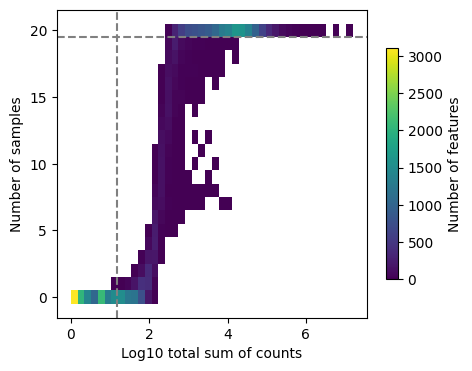

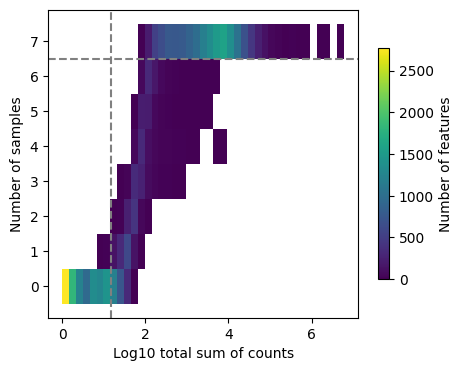

In [7]:
#check various filter points
#old
dc.plot_filter_by_expr(adata, group=None, min_count=10, min_total_count=15, large_n=1, min_prop=1)
dc.plot_filter_by_expr(subset_t2, group=None, min_count=10, min_total_count=15, large_n=1, min_prop=1,save='../figures/WT/t2_QC.png')


In [8]:
# Obtain genes that pass the thresholds
genes = dc.filter_by_expr(subset_t2, group=None, min_count=10, min_total_count=15, large_n=1, min_prop=1)
genes.size

15137

In [9]:
# Filter by these genes
adata = subset_t2[:, genes].copy()
adata

AnnData object with n_obs × n_vars = 7 × 15137
    obs: 'condition', 'time_point', 'DOX'

In [10]:
!pip install pydeseq2

In [11]:
# Import DESeq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [12]:
adata.X = np.round(adata.X,0)

In [13]:
# Build DESeq2 object
dds = DeseqDataSet(
    adata=adata,
    design_factors='condition',
    refit_cooks=True,
    n_cpus=8,
)

In [14]:
# Compute LFCs
dds.deseq2()

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 77.72 seconds.

Fitting dispersion trend curve...
... done in 25.41 seconds.

Fitting MAP dispersions...
... done in 71.13 seconds.

Fitting LFCs...
... done in 7.46 seconds.

Refitting 0 outliers.



In [15]:
# Extract contrast 
stat_res = DeseqStats(dds, contrast=["condition", 'MAFA', 'Control'], n_cpus=8)

In [16]:
# Compute Wald test
stat_res.summary()

Running Wald tests...
... done in 2.22 seconds.



Log2 fold change & Wald test p-value: condition MAFA vs Control


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,856324.687500,0.237853,0.128584,1.849788,6.434410e-02,1.293892e-01
MT-CO1,303544.937500,0.111150,0.242217,0.458886,6.463158e-01,7.585791e-01
GCG,215986.015625,-1.557492,0.252290,-6.173408,6.683327e-10,6.347661e-09
INS,110437.734375,-0.197277,0.248085,-0.795198,4.264982e-01,5.692159e-01
MT-ND4,125599.765625,-0.048851,0.226161,-0.216001,8.289874e-01,8.934458e-01
...,...,...,...,...,...,...
CNTD2,13.673280,-0.146963,0.485983,-0.302403,7.623449e-01,8.471370e-01
AL354751.1,15.011662,0.199704,0.520653,0.383564,7.013013e-01,8.011847e-01
ZNF451-AS1,13.238357,0.438054,0.470248,0.931539,3.515750e-01,4.952019e-01


In [17]:
# Shrink LFCs
stat_res.lfc_shrink(coeff='condition_MAFA_vs_Control')

Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: condition MAFA vs Control


... done in 6.77 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,856324.687500,2.836625,0.158263,1.849788,6.434410e-02,1.293892e-01
MT-CO1,303544.937500,1.265874,0.330110,0.458886,6.463158e-01,7.585791e-01
GCG,215986.015625,-1.404215,0.260137,-6.173408,6.683327e-10,6.347661e-09
INS,110437.734375,-1.090466,0.281017,-0.795198,4.264982e-01,5.692159e-01
MT-ND4,125599.765625,0.495513,0.236143,-0.216001,8.289874e-01,8.934458e-01
...,...,...,...,...,...,...
CNTD2,13.673280,-0.075448,0.411287,-0.302403,7.623449e-01,8.471370e-01
AL354751.1,15.011662,0.097077,0.439281,0.383564,7.013013e-01,8.011847e-01
ZNF451-AS1,13.238357,0.245580,0.422384,0.931539,3.515750e-01,4.952019e-01


In [18]:
# Extract results
results_df = stat_res.results_df
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,856324.687500,2.836625,0.158263,1.849788,6.434410e-02,1.293892e-01
MT-CO1,303544.937500,1.265874,0.330110,0.458886,6.463158e-01,7.585791e-01
GCG,215986.015625,-1.404215,0.260137,-6.173408,6.683327e-10,6.347661e-09
INS,110437.734375,-1.090466,0.281017,-0.795198,4.264982e-01,5.692159e-01
MT-ND4,125599.765625,0.495513,0.236143,-0.216001,8.289874e-01,8.934458e-01
...,...,...,...,...,...,...
CNTD2,13.673280,-0.075448,0.411287,-0.302403,7.623449e-01,8.471370e-01
AL354751.1,15.011662,0.097077,0.439281,0.383564,7.013013e-01,8.011847e-01
ZNF451-AS1,13.238357,0.245580,0.422384,0.931539,3.515750e-01,4.952019e-01


In [19]:
!pip install adjustText

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


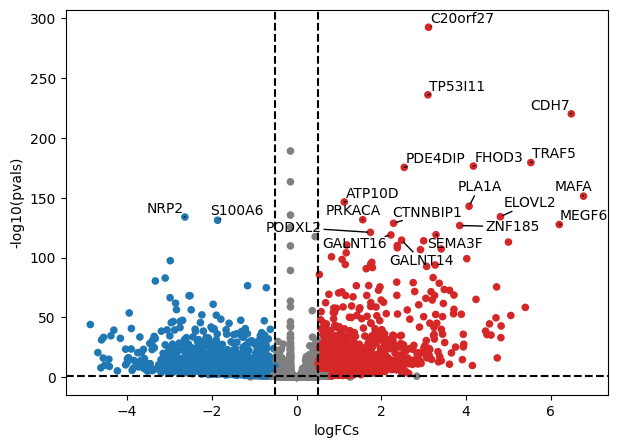

In [20]:
dc.plot_volcano_df(results_df, x='log2FoldChange', y='padj', top=20, save='../figures/WT/t2_volcano.png')

In [21]:
mat = results_df[['stat']].T.rename(index={'stat': 'treatment.vs.control'})
mat

gene_name,CHGA,MT-CO1,GCG,INS,MT-ND4,EEF1A1,MT-ND5,TTR,MT-CO2,MT-CYB,...,LINC01135,AL022069.1,SLC4A5,AC010894.2,SUGT1P1,CNTD2,AL354751.1,ZNF451-AS1,AC090229.1,C1S
treatment.vs.control,1.849788,0.458886,-6.173408,-0.795198,-0.216001,2.540171,0.253253,-13.026464,-0.292886,0.135811,...,2.51773,-0.238043,0.71009,1.021908,-0.075381,-0.302403,0.383564,0.931539,1.746151,1.857942


### Transcription factor activity inference

In [22]:
collectri = dc.get_collectri(organism='human')
collectri

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  File "/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/decoupler/omnip.py", line 523, in get_collectri
    ct = op.interactions.CollecTRI.get(
  File "/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/omnipath/_core/requests/_utils.py", line 114, in wrapper
    return wrapped(*args, **kwargs)
  File "/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/omnipath/_core/requests/_utils.py", line 31, in _get_helper
    return cls()._get(**kwargs)
  File "/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/omnipath/_core/requests/_request.py", line 108, in _get
    kwargs = self._validate_params(kwargs)
  File "/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/omnipath/_core/requests/_requ

AttributeError: module 'omnipath' has no attribute 'static'

### Activity inference with Univariate Linear Model (ULM)

In [ ]:
# Infer TF activities with ulm
tf_acts, tf_pvals = dc.run_ulm(mat=mat, net=collectri, verbose=True)
tf_acts

In [ ]:
dc.plot_barplot(tf_acts, 'treatment.vs.control', top=25, vertical=True,save='../figures/WT/t2_tf_activities.png')

In [ ]:
#activated
dc.plot_targets(results_df, stat='stat', source_name='PREB', net=collectri, top=15,save='../figures/WT/t2_PREB_targets.png')
dc.plot_targets(results_df, stat='stat', source_name='BCL11B', net=collectri, top=15,save='../figures/WT/t2_BCL11B_targets.png')
dc.plot_targets(results_df, stat='stat', source_name='SIN3A', net=collectri, top=15,save='../figures/WT/t2_SIN3A_targets.png')
#inhibited
dc.plot_targets(results_df, stat='stat', source_name='E2F1', net=collectri, top=15,save='../figures/WT/t2_E2F1_targets.png')
dc.plot_targets(results_df, stat='stat', source_name='JUN', net=collectri, top=15,save='../figures/WT/t2_JUN_targets.png')
#MAFA
dc.plot_targets(results_df, stat='stat', source_name='MAFA', net=collectri, top=15,save='../figures/WT/t2_MAFA_targets.png')

## Plot Networks

In [ ]:
dc.plot_network(
    net=collectri,
    obs=mat,
    act=tf_acts,
    n_sources=['PREB', 'BCL11B', 'SIN3A', 'E2F1', 'JUN', 'MAFA'],
    n_targets=10,
    node_size=0.5,
    label_size=8,
    figsize=(10, 10),
    c_pos_w='darkgreen',
    c_neg_w='darkred',
    vcenter=True,
    save = '../figures/WT/t2_plot_networks.png'
)

In [ ]:
# Extract logFCs and pvals
logFCs = results_df[['log2FoldChange']].T.rename(index={'log2FoldChange': 'treatment.vs.control'})
pvals = results_df[['padj']].T.rename(index={'padj': 'treatment.vs.control'})

# Plot
dc.plot_volcano(logFCs, pvals, 'treatment.vs.control', name='MAFA', net=collectri, top=10, sign_thr=0.05, lFCs_thr=0.5)

### Pathway activity inference

In [ ]:
# Retrieve PROGENy model weights
progeny = dc.get_progeny(top=500)
progeny

### Activity inference with multivariate Linear Model (MLM)

In [ ]:
# Infer pathway activities with mlm
pathway_acts, pathway_pvals = dc.run_mlm(mat=mat, net=progeny, verbose=True)
pathway_acts

In [ ]:
dc.plot_barplot(pathway_acts, 'treatment.vs.control', top=30, vertical=False,save='../figures/WT/t2_pathway_activities.png')

In [ ]:
# increase activity
dc.plot_targets(results_df, stat='stat', source_name='p53', net=progeny, top=30,save='../figures/WT/t2_p53_targets.png')
dc.plot_targets(results_df, stat='stat', source_name='Hypoxia', net=progeny, top=20,save='../figures/WT/t2_Hypoxia_targets.png')
# decrease activity
dc.plot_targets(results_df, stat='stat', source_name='JAK-STAT', net=progeny, top=20, save='../figures/WT/t2_JAK-STAT_targets.png')
dc.plot_targets(results_df, stat='stat', source_name='TGFb', net=progeny, top=20,save='../figures/WT/t2_TGFb_targets.png')

# Approach to investigate p53 -> PPI -> mechanism? -> ask -> Table with list of targets for each one of the pathways with statistics 

### Funtional enrichment of Biological Terms

In [ ]:
# The Molecular Signatures Database (MSigDB) is a resource containing a collection of gene sets annotated to different biological processes.
msigdb = dc.get_resource('MSigDB')
msigdb

In [ ]:
msigdb['collection'].unique()

In [ ]:
# Filter by hallmark
msigdb = msigdb[msigdb['collection']=='hallmark']

# Remove duplicated entries
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]

# Rename
msigdb.loc[:, 'geneset'] = [name.split('HALLMARK_')[1] for name in msigdb['geneset']]

msigdb

## ORA 

In [ ]:
# Infer enrichment with ora using significant deg
top_genes = results_df[results_df['padj'] < 0.05]

# Run ora
enr_pvals = dc.get_ora_df(
    df=top_genes,
    net=msigdb,
    source='geneset',
    target='genesymbol'
)

enr_pvals.head()

In [ ]:
dc.plot_dotplot(
    enr_pvals.sort_values('Combined score', ascending=False).head(15),
    x='Combined score',
    y='Term',
    s='Odds ratio',
    c='FDR p-value',
    scale=0.4,
    figsize=(5, 10),
    save='../figures/WT/t2_ORA.png'
)